In [5]:
from numpy import *
randMat=mat(random.rand(4,4))
invrandMat=randMat.I#逆运算
myEye=randMat*invrandMat#逆矩阵与原始矩阵相乘，得到单位矩阵
myEye-eye(4)#差值

matrix([[ 0.00000000e+00,  0.00000000e+00,  2.22044605e-16,
          0.00000000e+00],
        [ 0.00000000e+00, -2.22044605e-16,  0.00000000e+00,
          6.66133815e-16],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 2.22044605e-16, -5.55111512e-17,  1.11022302e-16,
         -1.11022302e-16]])

In [ ]:
#KNN


In [52]:
import numpy as np
import matplotlib.pyplot as plt
#inx      测试样本数据
#dataSet  训练样本数据
#labels   测试样本标签
#k        选取距离最近的k个点
def classify0(inx, dataSet, labels, k):
    #获取训练数据集的行数
    dataSetSize=dataSet.shape[0]
    #欧氏距离计算
    #各个函数均使用矩阵形式保存
    #tile():inx沿各个维度的复制次数
    diffMat=tile(inx, (dataSetSize, 1))-dataSet
    sqDiffMat=diffMat**2
    #.sum()运行加函数，参数axis=1表示矩阵每一行的各个值加和
    sqDistances=sqDiffMat.sum(axis=1)
    distances=sqDistances**0.5
    #获取排序（有小到大）后的距离值的索引序号
    sortedDistIndicies=distances.argsort()
    #字典，键值对，结构类似于hash表
    classCount={}
    for i in range(k):
        voteIlabel=labels[sortedDistIndicies[i]]
        classCount[voteIlabel]=classCount.get(voteIlabel, 0)+1
    sortedClassCount=sorted(classCount.items(),
                           key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0] #返回第一个元素（即出现次数最多的）标签key

In [53]:
#代数运算
def classify_two(inX, dataSet, labels, k):
    m, n = dataSet.shape   # shape（m, n）m列n个特征
    # 计算测试数据到每个点的欧式距离
    distances = []
    for i in range(m):
        sum = 0
        for j in range(n):
            sum += (inX[j] - dataSet[i][j]) ** 2
        distances.append(sum ** 0.5)

    sortDist = sorted(distances)

    # k 个最近的值所属的类别
    classCount = {}
    for i in range(k):
        voteLabel = labels[ distances.index(sortDist[i])]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1 # 0:map default
    sortedClass = sorted(classCount.items(), key=lambda d:d[1], reverse=True)
    return sortedClass[0][0]

In [54]:
#operator 是运算符模块
import operator
def createDataSet():
    group=array([[1.0,1.1], [1.0,1.0], [0,0], [0,0.1]])
    labels=['A', 'A', 'B', 'B']
    return group, labels

In [55]:
if __name__=='__main__':
    dataSet, labels=createDataSet()
    r=classify_two([0,0.2], dataSet, labels, 3)
    print r

B


In [56]:
# 文本转换成numpy
def file2matrix(filepath="dataset.txt"):
    dataSet = np.loadtxt(filepath)
    returnMat = dataSet[:, 0:-1]
    classlabelVector = dataSet[:, -1:]
    return returnMat, classlabelVector

In [57]:
#文本转换成Numpy的解析程序
def file2matrix(filepath="C:\Users\GAOBING\Desktop\dataset.txt"):
    fr=open(filepath)
    arrayOLines=fr.readlines()
    numberOfLines=len(arrayOLines)
    returnMat=zeros((numberOfLines, 3))
    classLabelVector=[]
    index=0
    for line in arrayOLines:
        line=line.strip()
        listFromLine=line.split('\t')
        returnMat[index, :]=listFromLine[:3]
        classLabelVector.append(int(listFromLine[-1]))
        index+=1
    return returnMat, classLabelVector

In [58]:
def show_2_3_fig():
    data, cls=file2matrix()
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(data[:,1], data[:,2])
    plt.xlabel("playing game")
    plt.ylabel("Icm Cream")
    plt.show()
    

In [59]:
def show_1_2_fig():
    data, cls=file2matrix()
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1])
    plt.xlabel("playing game")
    plt.ylabel("Icm Cream")
    plt.show()

In [60]:
def show_1_3_fig():
    data, cls=file2matrix()
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,2])
    plt.xlabel("playing game")
    plt.ylabel("Icm Cream")
    plt.show()

In [61]:
#数据归一化
def autoNorm(dataSet):
    minVal=dataSet.min(0)#每列最小值（1*3）
    maxVal=dataSet.max(0)#每列最大值（1*3）
    ranges=maxVal-minVal#最大值与最小值之差，（1*3）
    
    normDataSet=np.zeros(dataSet.shape)#产生和dataSet一样的0矩阵
    m, n=dataSet.shape#m行，n个特征 
    normDataSet=dataSet-tile(minVal, (m,1))#因为minVal只有一行，我们将其复制成m行
    normDataSet=normDataSet/tile(ranges, (m,1))
    return normDataSet, ranges, minVal

In [68]:
# 定义测试算法的函数
def classifypersion(h=0.15):
    hoRatio = h
    datingDataMat, datingLabels = file2matrix()
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m, n = normMat.shape
    numTestVecs = int(m * hoRatio)  #测试数据行数
    errorCount = 0  # 错误分类数


    # 用前10%的数据做测试
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m],  3)
        # print('the classifier came back with: %d,the real answer is: %d' % (int(classifierResult), int(datingLabels[i])))
        if classifierResult != datingLabels[i]:
            errorCount += 1
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))

the total error rate is: 0.066667


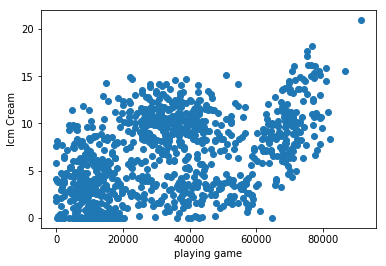

In [70]:
if __name__ == '__main__':
    # data, cls = file2matrix()
    # autoNorm(data)
    # datingClassTest()
    classifypersion()
    #show_1_2_fig()